In [1]:
import cv2
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import seaborn as sns 

In [2]:
df = load_breast_cancer()

In [3]:
df = pd.DataFrame(df.data,columns=df.feature_names,)

In [4]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
df['target'] = load_breast_cancer().target

In [6]:
X = df['mean radius'].values
Y = df['mean texture'].values

# Quantiles and Percentiles <-

## 1. Introduction

**Quantiles and percentiles** are measures of position used in statistics to describe how data is distributed. They help us understand the **relative standing of a value within a dataset**.

---

## 2. Quantiles

Quantiles divide a dataset into **equal-sized parts**.

### Common Types of Quantiles

#### 2.1 Quartiles

Divide data into **four equal parts**.

* **Q1 (First Quartile):** 25% of data lies below this value
* **Q2 (Second Quartile):** 50% of data lies below (this is the **Median**)
* **Q3 (Third Quartile):** 75% of data lies below this value

**Use:**

* Understand data spread
* Identify outliers

---

#### 2.2 Quintiles

Divide data into **five equal parts**.

* Each quintile represents **20% of the data**
* Q1, Q2, Q3, Q4 (quintile cut points)

**Example:**

* Second quintile → 40% of data lies below this value

**Use:**

* Common in economics and income distribution

---

#### 2.3 Deciles

Divide data into **ten equal parts**.

* D1, D2, …, D9
* Each decile represents 10% of the data

**Example:**

* D3 → 30% of data lies below this value

---

#### 2.2 Deciles

Divide data into **ten equal parts**.

* D1, D2, …, D9
* Each decile represents 10% of the data

**Example:**

* D3 → 30% of data lies below this value

---

## 3. Percentiles

Percentiles divide data into **100 equal parts**.

* The **k-th percentile (Pk)** is the value below which **k% of the data** lies.

**Examples:**

* P25 → 25% of data lies below
* P50 → Median
* P90 → 90% of data lies below

**Common Uses:**

* Exam scores
* Income distribution
* Performance ranking

---

## 4. Formula for Position

### Quartile Position

* Qk position = k(n + 1) / 4

### Decile Position

* Dk position = k(n + 1) / 10

### Percentile Position

* Pk position = k(n + 1) / 100

where:

* k = order of quartile/decile/percentile
* n = number of observations

---

## 5. Comparison Table

| Measure     | Divides Data Into | Example            |
| ----------- | ----------------- | ------------------ |
| Quartiles   | 4 parts           | Q1, Q2, Q3         |
| Quintiles   | 5 parts           | 20%, 40%, 60%, 80% |
| Deciles     | 10 parts          | D1–D9              |
| Percentiles | 100 parts         | P10, P50, P90      |
---

## 6. Importance

* Helps understand **data distribution**
* Useful for **comparative analysis**
* Widely used in education, economics, and data science

---

## 7. Conclusion

Quantiles and percentiles are essential tools for **analyzing the relative position of data values**, giving deeper insight into how data is distributed beyond averages.


(np.float64(-0.5), np.float64(859.5), np.float64(487.5), np.float64(-0.5))

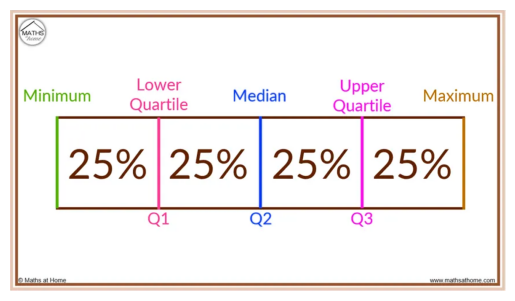

In [7]:
img = cv2.imread("/home/spidy/SPIDY___/Math/MATH/MY_MATH/Statistics/img/5_number_summery.webp")
plt.imshow(img)
plt.axis("off")

# Five Number Summary <-

## 1. Definition

The **Five Number Summary** is a descriptive statistical tool that provides a **quick overview of the distribution of a dataset** using five key values.

It helps understand:

* Center
* Spread
* Skewness
* Presence of outliers

---

## 2. The Five Numbers

1. **Minimum (Min)**

   * The smallest value in the dataset

2. **First Quartile (Q1)**

   * 25% of the data lies below this value

3. **Median (Q2)**

   * The middle value (50th percentile)

4. **Third Quartile (Q3)**

   * 75% of the data lies below this value

5. **Maximum (Max)**

   * The largest value in the dataset

---

## 3. Representation

The five number summary is commonly visualized using a **Box Plot (Whisker Plot)**.

* Box → from Q1 to Q3
* Line inside box → Median
* Whiskers → Min and Max

---

## 4. Example

For the dataset:

`2, 4, 6, 8, 10, 12, 14`

* Min = 2
* Q1 = 4
* Median = 8
* Q3 = 12
* Max = 14

---

## 5. Importance

* Summarizes data efficiently
* Helps detect outliers
* Useful for comparing distributions
* Forms the basis of box plots

---

## 6. Summary Table

| Measure     | Meaning         |
| ----------- | --------------- |
| Minimum     | Smallest value  |
| Q1          | 25th percentile |
| Median (Q2) | 50th percentile |
| Q3          | 75th percentile |
| Maximum     | Largest value   |

---

## 7. Conclusion

The **Five Number Summary** provides a concise and powerful way to understand the **distribution and spread of data**, especially when combined with graphical methods like box plots.


# Interquartile Range (IQR) <-

## 1. Definition

The **Interquartile Range (IQR)** is a measure of variability that describes the **spread of the middle 50% of the data**.

It is the difference between the third quartile (Q3) and the first quartile (Q1).

---

## 2. Formula

**IQR = Q3 − Q1**

where:

* **Q1 (First Quartile):** 25th percentile
* **Q3 (Third Quartile):** 75th percentile

---

## 3. How to Calculate IQR

1. Arrange the data in ascending order
2. Find **Q1** (median of the lower half)
3. Find **Q3** (median of the upper half)
4. Subtract Q1 from Q3

---

## 4. Example

Dataset:

`2, 4, 6, 8, 10, 12, 14, 16`

* Q1 = 6
* Q3 = 12

**IQR = 12 − 6 = 6**

---

## 5. Importance of IQR

* Measures spread of central data
* **Not affected by outliers**
* Useful for skewed distributions
* Forms the basis of **box plots**

---

## 6. IQR and Outliers

Outliers can be detected using IQR:

* Lower bound = Q1 − 1.5 × IQR
* Upper bound = Q3 + 1.5 × IQR

Values outside these limits are considered **outliers**.

---

## 7. Conclusion

The **Interquartile Range (IQR)** is a reliable and robust measure of variability that focuses on the **central portion of data**, making it especially useful in real-world data analysis.


# Box plot <-

(np.float64(-0.5), np.float64(749.5), np.float64(349.5), np.float64(-0.5))

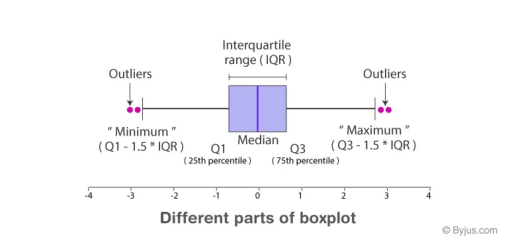

In [8]:
img = cv2.imread("/home/spidy/SPIDY___/Math/MATH/MY_MATH/Statistics/img/box_plot_part.webp")
plt.imshow(img)
plt.axis("off")

# Box Plot (Whisker Plot) <-

## 1. Definition

A **Box Plot** (also called a **Whisker Plot**) is a graphical representation that displays the **distribution of data** using the five-number summary.

It shows:

* Center
* Spread
* Skewness
* Outliers

---

## 2. Components of a Box Plot

A box plot is based on the **Five Number Summary**:

1. **Minimum** – Smallest data value (excluding outliers)
2. **First Quartile (Q1)** – 25th percentile
3. **Median (Q2)** – 50th percentile
4. **Third Quartile (Q3)** – 75th percentile
5. **Maximum** – Largest data value (excluding outliers)

---

## 3. Structure of a Box Plot

* **Box:** Extends from Q1 to Q3 (represents IQR)
* **Line inside box:** Median
* **Whiskers:** Extend from the box to minimum and maximum values
* **Points outside whiskers:** Outliers

---

## 4. Interquartile Range (IQR) in Box Plot

* **IQR = Q3 − Q1**
* The box length represents the IQR

### Outlier Detection

* Lower bound = Q1 − 1.5 × IQR
* Upper bound = Q3 + 1.5 × IQR

Values outside these bounds are plotted as **outliers**.

---

## 5. Example

For the dataset:

`2, 4, 6, 8, 10, 12, 14`

* Min = 2
* Q1 = 4
* Median = 8
* Q3 = 12
* Max = 14

This information is used to draw the box plot.

---

## 6. Advantages of Box Plot

* Summarizes large datasets
* Shows data spread clearly
* Identifies outliers easily
* Useful for comparing multiple datasets

---

## 7. Disadvantages of Box Plot

* Does not show individual data points
* Less informative for small datasets
* Does not show exact distribution shape

---

## 8. Types of Box Plot

### 8.1 Simple Box Plot

* Displays the distribution of **one dataset**.
* Shows median, quartiles, range, and outliers.

---

### 8.2 Multiple (Grouped) Box Plot

* Displays **two or more box plots side by side**.
* Used to compare distributions of multiple groups.

**Example:** Comparing exam scores of different classes.

---

### 8.3 Notched Box Plot

* Contains a **notch around the median**.
* Used to compare medians of different datasets.
* Non-overlapping notches indicate significantly different medians.

---

### 8.4 Horizontal Box Plot

* Box plot drawn **horizontally** instead of vertically.
* Useful when category names are long.

---

## 9. Uses of Box Plot

* Comparing distributions
* Detecting skewness
* Identifying outliers
* Exploratory data analysis (EDA)

---

## 9. Conclusion

A **Box Plot** is a powerful visual tool that provides a **compact summary of data distribution**, especially useful when combined with measures like the IQR and five-number summary.


# Scatter plot

<Axes: >

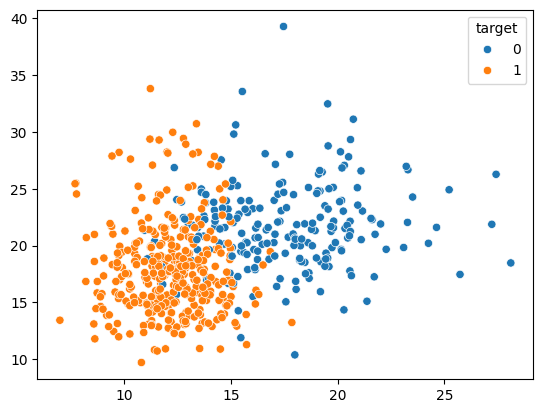

In [9]:
sns.scatterplot(x=X, y=Y, hue=df['target'])

# Scatter Plot <- 

## 1. Definition

A **Scatter Plot** is a graphical representation used to show the **relationship between two numerical (quantitative) variables**. Each point on the graph represents a pair of values.

---

## 2. Structure of a Scatter Plot

* **X-axis:** Independent variable
* **Y-axis:** Dependent variable
* **Point (x, y):** Represents one observation

---

## 3. Purpose of Scatter Plot

* Identify **relationship** between variables
* Detect **trends or patterns**
* Identify **outliers**
* Understand **correlation**

---

## 4. Types of Relationships

### 4.1 Positive Correlation

* As X increases, Y increases

### 4.2 Negative Correlation

* As X increases, Y decreases

### 4.3 No Correlation

* No clear pattern between X and Y

---

## 5. Scatter Plot and Correlation

* **Strong correlation:** Points close to a straight line
* **Weak correlation:** Points widely scattered
* Correlation values range from **−1 to +1**

---

## 6. Example

**Example:** Height vs Weight

* Each point represents a person
* Shows whether height and weight are related

---

## 7. Advantages of Scatter Plot

* Easy to understand
* Shows relationship clearly
* Helps detect outliers
* Useful for exploratory data analysis (EDA)

---

## 8. Disadvantages of Scatter Plot

* Does not show exact strength of relationship
* Difficult to interpret with very large datasets
* Only works with numerical data

---

## 9. Uses of Scatter Plot

* Studying correlation
* Regression analysis
* Trend analysis
* Data exploration

---

## 10. Conclusion

A **Scatter Plot** is a powerful visualization tool used to analyze the **relationship between two variables**, making it essential in statistics, data science, and research.


# Variance

## 1. Definition

**Variance** is a measure of variability that shows **how far data values are spread out from the mean**.

* A **small variance** indicates data points are close to the mean
* A **large variance** indicates data points are widely spread

---

## 2. Formula

### Population Variance

[ \sigma^2 = \frac{\sum (X - \mu)^2}{N} ]

where:

* (X) = each data value
* (\mu) = population mean
* (N) = total number of observations

---

### Sample Variance

[ s^2 = \frac{\sum (x - \bar{x})^2}{n - 1} ]

where:

* (x) = each sample value
* (\bar{x}) = sample mean
* (n) = sample size

*(n − 1 is used to reduce bias)*

---

## 3. Steps to Calculate Variance

1. Find the mean
2. Subtract the mean from each observation
3. Square each deviation
4. Find the average of squared deviations

---

## 4. Example

Dataset:

`2, 4, 6`

Mean = 4

[
(2−4)^2 + (4−4)^2 + (6−4)^2 = 4 + 0 + 4 = 8
]

* Population variance = 8 / 3 ≈ 2.67
* Sample variance = 8 / 2 = 4

---

## 5. Properties of Variance

* Always **non-negative**
* Sensitive to **outliers**
* Measured in **squared units**

---

## 6. Advantages

* Uses all data values
* Important for advanced statistics
* Foundation for standard deviation

---

## 7. Disadvantages

* Difficult to interpret due to squared units
* Strongly affected by extreme values

---

## 8. Relationship with Standard Deviation

[ \text{Standard Deviation} = \sqrt{\text{Variance}} ]

---

## 9. Conclusion

**Variance** is a fundamental statistical measure that quantifies the **spread of data**, forming the basis for many statistical analyses such as standard deviation, hypothesis testing, and regression.


(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

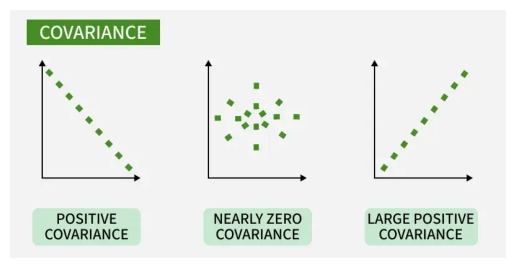

In [10]:
img = cv2.imread('/home/spidy/SPIDY___/Math/MATH/MY_MATH/Statistics/img/Covariance.webp')
plt.imshow(img)
plt.axis('off')

# Covariance

## 1. Definition

**Covariance** is a statistical measure that indicates the **direction of the relationship between two numerical variables**.

It shows whether two variables **increase together**, **decrease together**, or move in **opposite directions**.

---

## 2. Interpretation of Covariance

* **Positive Covariance:** Both variables increase or decrease together
* **Negative Covariance:** One variable increases while the other decreases
* **Zero Covariance:** No linear relationship

> Covariance indicates **direction**, not strength.

---

## 3. Formula

### Population Covariance

[ \text{Cov}(X, Y) = \frac{\sum (X - \mu_X)(Y - \mu_Y)}{N} ]

where:

* (X, Y) = variables
* (\mu_X, \mu_Y) = population means
* (N) = number of observations

---

### Sample Covariance

[ \text{cov}(x, y) = \frac{\sum (x - \bar{x})(y - \bar{y})}{n - 1} ]

where:

* (x, y) = sample values
* (\bar{x}, \bar{y}) = sample means
* (n) = sample size

---

## 4. Steps to Calculate Covariance

1. Find the mean of X and Y
2. Subtract the mean from each value
3. Multiply corresponding deviations
4. Take the average of the products

---

## 5. Example

| X | Y |
| - | - |
| 1 | 2 |
| 2 | 4 |
| 3 | 6 |

* Mean of X = 2
* Mean of Y = 4

Products of deviations:

[(1−2)(2−4) + (2−2)(4−4) + (3−2)(6−4) = 2 + 0 + 2 = 4]

* Population covariance = 4 / 3 ≈ 1.33
* Sample covariance = 4 / 2 = 2

---

## 6. Properties of Covariance

* Can be **positive, negative, or zero**
* Units are the **product of units** of X and Y
* Sensitive to **outliers**

---

## 7. Advantages

* Shows direction of relationship
* Uses all data points
* Foundation for correlation and regression

---

## 8. Disadvantages

* Difficult to interpret due to units
* Cannot compare strength across datasets
* Did not tell the strength of the relationship between two variable.(because it is affected by the scale of the variables.)


---

## 9. Relationship with Correlation

[ \text{Correlation} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y} ]

Correlation standardizes covariance and ranges from **−1 to +1**.

---

## 10. Conclusion

**Covariance** helps identify the **direction of association** between two variables, serving as a stepping stone toward correlation and regression analysis.

# covariance of a variable with itself
 - if we try to find the corviance of the same to two value(i.e, x to x) the outcome is variance
 

(np.float64(-0.5), np.float64(749.5), np.float64(542.5), np.float64(-0.5))

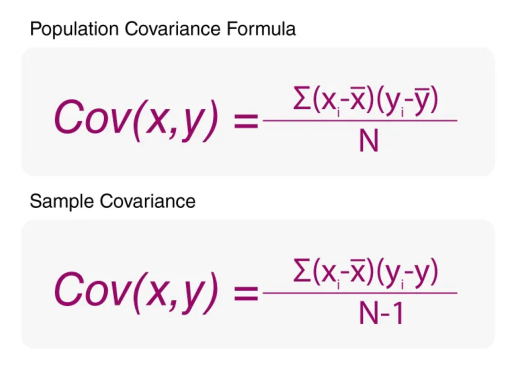

In [11]:
img = cv2.imread('/home/spidy/SPIDY___/Math/MATH/MY_MATH/Statistics/img/Covariance-Formula.webp')
plt.imshow(img)
plt.axis('off')

(np.float64(-0.5), np.float64(611.5), np.float64(390.5), np.float64(-0.5))

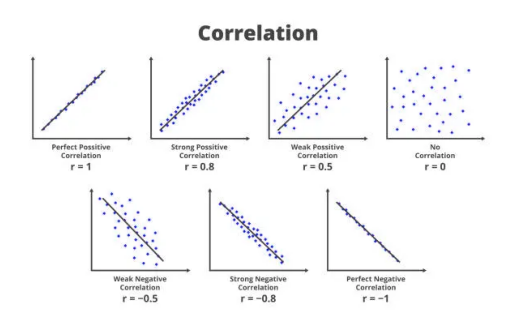

In [12]:
img = cv2.imread('/home/spidy/SPIDY___/Math/MATH/MY_MATH/Statistics/img/correlation.webp')
plt.imshow(img)
plt.axis('off')

# Correlation

## 1. Definition

**Correlation** is a statistical measure that describes the **strength and direction of the linear relationship between two variables**.

* Ranges from **−1 to +1**
* Indicates both **direction** and **degree of association**

---

## 2. Types of Correlation

### 2.1 Positive Correlation

* Both variables increase or decrease together
* Example: Height and weight

### 2.2 Negative Correlation

* One variable increases while the other decreases
* Example: Number of absences and grades

### 2.3 Zero Correlation

* No linear relationship between variables
* Example: Shoe size and IQ

---

## 3. Correlation Coefficient (r)

### Formula (Pearson Correlation)

[ r = \frac{\text{Cov}(X,Y)}{\sigma_X \sigma_Y} ]

where:

* Cov(X,Y) = covariance of X and Y
* (\sigma_X, \sigma_Y) = standard deviation of X and Y

### Properties of r

* **+1:** Perfect positive correlation
* **-1:** Perfect negative correlation
* **0:** No linear correlation

---

## 4. Steps to Calculate Correlation

1. Find the mean of X and Y
2. Calculate deviations from the mean
3. Compute covariance of X and Y
4. Divide by the product of standard deviations

---

## 5. Example

| X | Y |
| - | - |
| 1 | 2 |
| 2 | 4 |
| 3 | 6 |

* Cov(X,Y) = 4/3 (population)
* σ_X = √(2/3), σ_Y = √(8/3)

[ r = \frac{4/3}{\sqrt{2/3} * \sqrt{8/3}} = 1 ]

* Perfect positive correlation

---

## 6. Advantages

* Shows **strength and direction**
* Standardized measure (unitless)
* Useful for regression analysis

---

## 7. Disadvantages

* Only measures **linear relationships**
* Sensitive to **outliers**
* Does not imply causation

---

## 8. Uses of Correlation

* Relationship analysis between variables
* Predictive modeling
* Data exploration in research

---

## 9. Conclusion

**Correlation** is an essential statistical tool to quantify the **linear relationship** between two variables, forming the foundation for regression and predictive modeling.


# Visualizing Multiple Variables

## 1. Introduction

**Visualizing multiple variables** (multivariate visualization) helps us understand **relationships, patterns, and interactions** among **two or more variables** in a dataset.

It is commonly used in:

* Exploratory Data Analysis (EDA)
* Data science
* Statistics and research

---

## 2. Types Based on Number of Variables

### 2.1 Bivariate Visualization (Two Variables)

* Scatter Plot
* Line Plot
* Box Plot (grouped)

### 2.2 Multivariate Visualization (Three or More Variables)

* Bubble Chart
* Pair Plot
* Heatmap
* 3D Scatter Plot

---

## 3. Common Graphs for Visualizing Multiple Variables

### 3.1 Scatter Plot with Color / Size

* X-axis → Variable 1
* Y-axis → Variable 2
* Color / size → Variable 3

**Use:** Shows relationship among 3 variables

---

### 3.2 Bubble Chart

* Extension of scatter plot
* Bubble size represents a third variable

**Example:**

* X = GDP
* Y = Life expectancy
* Bubble size = Population

---

### 3.3 Grouped Box Plot

* Compares a numerical variable across categories

**Example:** Exam scores by different classes

---

### 3.4 Heatmap

* Uses color intensity to represent values
* Often used for **correlation matrices**

**Use:** Shows relationships among many variables at once

---

### 3.5 Pair Plot (Scatter Matrix)

* Grid of scatter plots for each pair of variables
* Diagonal shows distribution (histogram / density)

**Use:** Detects patterns and correlations

---

### 3.6 3D Scatter Plot

* X, Y, Z axes represent three numerical variables

**Limitation:** Harder to interpret than 2D plots

---

## 4. Summary Table

| Graph Type       | No. of Variables | Best Use                  |
| ---------------- | ---------------- | ------------------------- |
| Scatter Plot     | 2–3              | Relationship analysis     |
| Bubble Chart     | 3                | Size-based comparison     |
| Grouped Box Plot | 2–3              | Comparing distributions   |
| Heatmap          | Many             | Correlation visualization |
| Pair Plot        | Many             | Multivariable exploration |
| 3D Scatter Plot  | 3                | Spatial relationships     |

---

## 5. Advantages

* Reveals hidden patterns
* Helps compare multiple features
* Useful for decision making

---

## 6. Limitations

* Can become cluttered
* Harder to interpret for beginners
* Requires careful design

---

## 7. Conclusion

Visualizing multiple variables allows deeper insight into **complex datasets**, helping analysts understand relationships beyond single-variable or two-variable analysis.


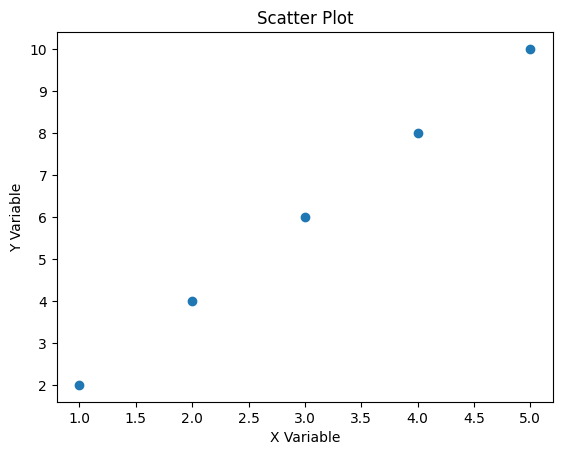

In [13]:


x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.scatter(x, y)
plt.xlabel("X Variable")
plt.ylabel("Y Variable")
plt.title("Scatter Plot")
plt.show()


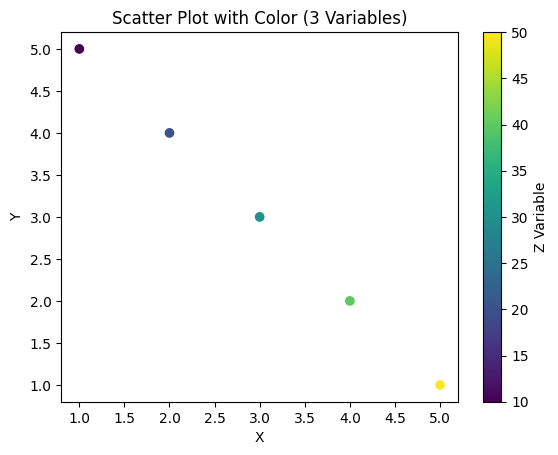

In [14]:


x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]
z = [10, 20, 30, 40, 50]  # third variable

plt.scatter(x, y, c=z)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot with Color (3 Variables)")
plt.colorbar(label="Z Variable")
plt.show()


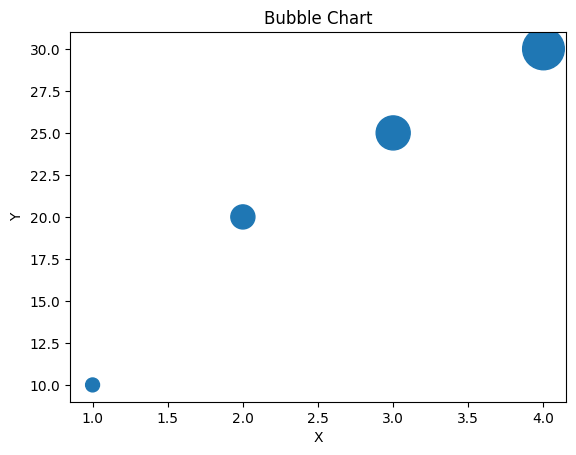

In [15]:


x = [1, 2, 3, 4]
y = [10, 20, 25, 30]
size = [100, 300, 600, 900]

plt.scatter(x, y, s=size)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Bubble Chart")
plt.show()


/tmp/ipykernel_8567/969196115.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data1, data2], labels=["Class A", "Class B"])


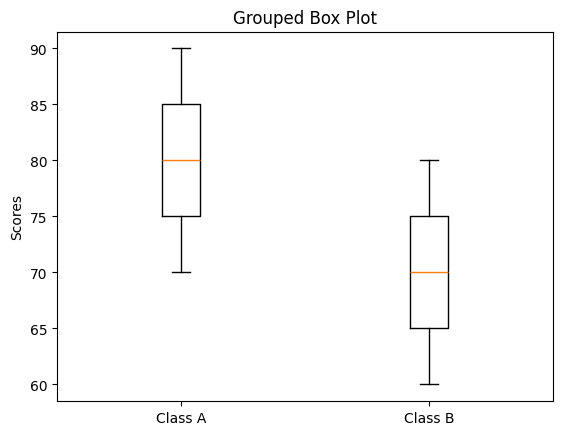

In [16]:


data1 = [70, 75, 80, 85, 90]
data2 = [60, 65, 70, 75, 80]

plt.boxplot([data1, data2], labels=["Class A", "Class B"])
plt.title("Grouped Box Plot")
plt.ylabel("Scores")
plt.show()


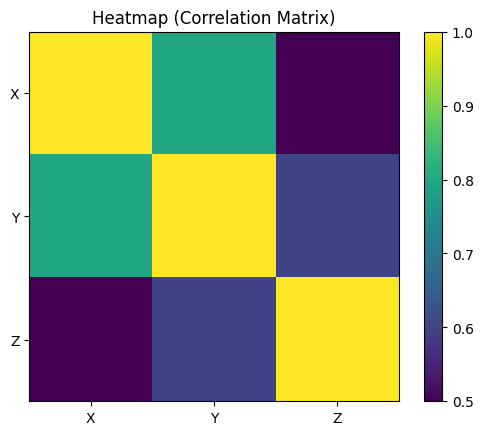

In [17]:

data = np.array([
    [1, 0.8, 0.5],
    [0.8, 1, 0.6],
    [0.5, 0.6, 1]
])

plt.imshow(data)
plt.colorbar()
plt.xticks([0,1,2], ["X", "Y", "Z"])
plt.yticks([0,1,2], ["X", "Y", "Z"])
plt.title("Heatmap (Correlation Matrix)")
plt.show()


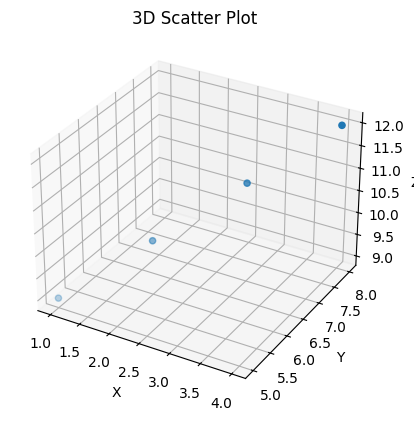

In [18]:
from mpl_toolkits.mplot3d import Axes3D

x = [1, 2, 3, 4]
y = [5, 6, 7, 8]
z = [9, 10, 11, 12]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Scatter Plot")

plt.show()


# Learn from campux
- link = https://drive.google.com/file/d/1edN9LSbMP3lPh4YMem4n9K0Y6lSeFaP1/view